# PW6 - Strom und Spannungsquellen


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp


pd.set_option('display.float_format', '{:.2f}'.format)

## Solarzellen als Gleichstromquelle


### Aufbau und Durchführung

Um die Strom-Spannungs-Kennlinie einer Solarzelle bei zwei unterschiedlichen Intensitäten des einfallenden Lichts zu ermitteln, wird diese als Stromquelle in einem Gleichstromkreis untersucht. Ein verstellbarer Widerstand $R_L$ simuliert hierbei verschiedene Verbraucher. Über einen bekannten Widerstand $R_I$ wird die Stromstärke durch Spannungsmessung ermittelt, da der Innenwiderstand eines Amperemeters zu hoch ist um bei diesem Experiment von Nutzen zu sein. 

Es werden also zwei Spannungen gemessen: die Spannung $U$ die über den gesamten Stromkreis abfällt und die Spannung $U_I$, die über $R_I$ abfällt um den Strom $I$ zu ermitteln. 

Aus diesen Werten wird die Strom-Spannungs-Kennlinie, die Werte der Leerlaufspannung und des Kurzschlussstroms, sowie die Leistung $P$ als Funktion vom Widerstand $R$ aufgetragen. Es wird die maximale Leistung $P_max$ und der zugehörige Widerstand $R_L,max$ abgelesen und der $CFF$ Faktor berechnet

Im Anschluss wird der Abstand zwischen Lampe und Solarzelle verändert und das ganze für eine andere Lichtintensität wiederholt.

### Messgeräte und Unsicherheite

* UNI-T-UT61B: Spannung: 4V Messbereich 0.001 auflösung (0.5% + 1 Digit)
* Widerstand: $(489\pm8)\Omega$



### Ergebnisse und Datenauswertung

[[2.12461764 2.12461764 2.13132079 2.13831391 2.15324621 2.1875279
  2.22924437 2.31176275 2.38649858 2.45800656 2.82249344 3.13561704
  3.68326882 4.13720549]]


,U [V],U Relativ,U_I [V],U_I Relativ,I [A],P [W]
0,0.085400,1.970960,0.005400,1.355556,0.011043,0.000943
1,0.423000,1.036407,0.005400,1.355556,0.011043,0.004671
2,0.779000,0.928370,0.005300,1.366038,0.010838,0.008443
3,1.440000,0.869444,0.005200,1.376923,0.010634,0.015313
4,1.788000,0.855928,0.005000,1.400000,0.010225,0.018282
5,2.058000,0.848591,0.004600,1.452174,0.009407,0.019360
6,2.202000,0.845413,0.004200,1.514286,0.008589,0.018913
7,2.408000,0.841528,0.003600,1.633333,0.007362,0.017728
8,2.501000,0.839984,0.003200,1.737500,0.006544,0.016366
9,2.564000,0.839002,0.002900,1.834483,0.005930,0.015206


$$U_{LL} = 2.94+/-0.06\,\text{V}$$

$$ I_{KS} = 0.0111+/-0.0004\,\text{A}$$

$$ P_{max} = 0.019+/-0.001\,\text{W}$$

$$ R_{L,max} = 219+/-9\,\Omega$$

$$ C_{FF} = 0.59+/-0.04$$

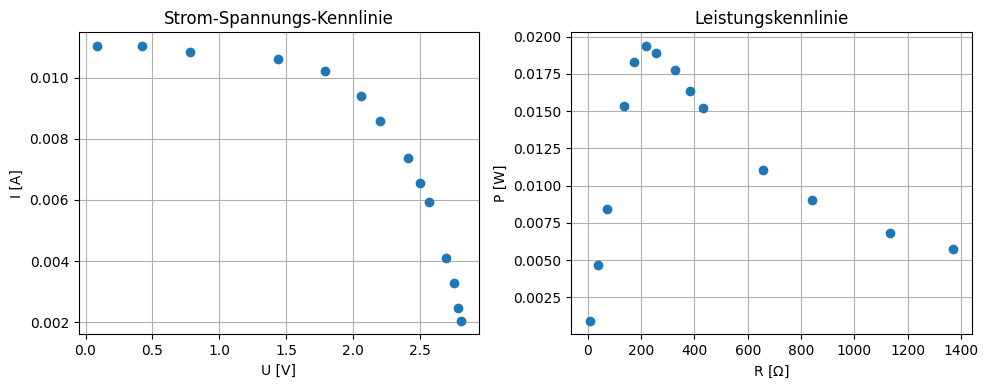

In [42]:
#intensität 15 cm


U = np.array([85.4, 423, 779, 1440, 1788, 2058, 2202, 2408, 2501, 2564, 2695, 2752, 2784, 2803]) /1000         #mv --> V
# +-*0.08 + 1
U_rel = ((U*0.008+0.001)/U)*100 # relative Unsicherheit # mal 100 weil prozent



##uU = unp.uarray(U*1000, U*1000*0.008+1)/1000


U_I = np.array([5.4, 5.4, 5.3, 5.2, 5, 4.6, 4.2, 3.6, 3.2, 2.9, 2, 1.6, 1.2, 1])/1000    #mv --> V # Spannung zum Strom berechnen
U_Irel = ((U_I*0.008+0.00003)/U_I)*100 # relative Unsicherheit

uU_I = unp.uarray([U_I*1000], [U_I*1000*0.008+0.03])/1000 # V
# +- *0.08 + 0.03

uR_I = ufloat(0.489, 0.008) #5%
Urel = 489/8 

R_I = 0.489 #ohm 

uI = uU_I / uR_I
I = U_I / R_I
I_rel = ((unp.std_devs(uI))/I) *100 # in prozent
print(I_rel)


# I = U_I / R_I #mA
# I_rel = unp.std_devs(uU_I/uR_I)/(U_I/R_I)*100 # relative Unsicherheit Strom #formel noch anschauen!!!
# print(I_rel)


P = U * I   #mW


R = U/I

I_k, I_d, I_r, _, I_std = linregress(U[:int(len(U)/3)], I[:int(len(U)/3)])

U_k, U_d, U_r, _, U_std = linregress(I[int(2*len(U)/3):], U[int(2*len(U)/3):])

I_KS = ufloat(I_d, I_d*0.04)
U_LL = ufloat(U_d, U_d*0.02)
#I_KS = ufloat(np.max(I),np.max(I)*0.1)
#U_LL = ufloat(np.max(U),np.max(U)*0.1)
idx_max = np.argmax(P)
U_opt = ufloat(U[idx_max], U[idx_max]*0.01) # als unsicherheit hier jeweils die höchste genomemn dann kann nix schief gehen. alternativ die unsicherheit von dem tatsächlichen Wert
I_opt = ufloat(I[idx_max], I[idx_max]*0.04)
P_max = ufloat(P[idx_max], P[idx_max]*0.05)
R_L_max = U_opt / I_opt
C_FF = P_max / (I_KS * U_LL)

data = {'U [V]': U, 'U Relativ': U_rel, 'U_I [V]': U_I, 'U_I Relativ': U_Irel, 'I [A]': I, 'P [W]': P}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte und berechnete Größen"))

display(Markdown(f"$$U_{{LL}} = {U_LL:.1u}\\,\\text{{V}}$$"))
display(Markdown(f"$$ I_{{KS}} = {I_KS:.1u}\\,\\text{{A}}$$"))
display(Markdown(f"$$ P_{{max}} = {P_max:.1u}\\,\\text{{W}}$$"))
display(Markdown(f"$$ R_{{L,max}} = {R_L_max:.1u}\\,\\Omega$$"))
display(Markdown(f"$$ C_{{FF}} = {C_FF:.1u}$$"))

plt.figure(figsize=(10,4))
#plt.title('Abstand 15 cm') #evtl hinzufügen wenn wir noch den titel drin haben wollen 
plt.subplot(1,2,1)
plt.plot(U, I, 'o')
plt.xlabel('U [V]')
plt.ylabel('I [A]')
plt.title('Strom-Spannungs-Kennlinie')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(R, P, 'o')
plt.xlabel(r'R [$\Omega$]')
plt.ylabel('P [W]')
plt.title('Leistungskennlinie')
plt.grid(True)
plt.tight_layout()
plt.show()

[[1.93177599 1.93177599 1.93269913 1.93363762 1.93654902 1.94862695
  1.96655086 1.98608687 2.01984723 2.05353068 2.32864589 2.62277891
  2.95988407 3.36702798 4.13720549]]


,U [V],U Relativ,U_I [V],U_I Relativ,I [A],P [W]
0,0.207700,1.281464,0.013200,1.027273,0.026994,0.005607
1,0.717000,0.939470,0.013200,1.027273,0.026994,0.019355
2,1.326000,0.875415,0.013100,1.029008,0.026789,0.035523
3,1.867000,0.853562,0.013000,1.030769,0.026585,0.049634
4,2.405000,0.841580,0.012700,1.036220,0.025971,0.062461
5,2.704000,0.836982,0.011600,1.058621,0.023722,0.064144
6,2.853000,0.835051,0.010300,1.091262,0.021063,0.060094
7,2.930000,0.834130,0.009200,1.126087,0.018814,0.055125
8,3.001000,0.833322,0.007800,1.184615,0.015951,0.047869
9,3.057000,0.832712,0.006800,1.241176,0.013906,0.042510


$$U_{LL} = 3.21+/-0.03\,\text{V}$$

$$ I_{KS} = 0.027+/-0.001\,\text{A}$$

$$ P_{max} = 0.064+/-0.003\,\text{W}$$

$$ R_{L,max} = 114+/-5\,\Omega$$

$$ C_{FF} = 0.73+/-0.05$$

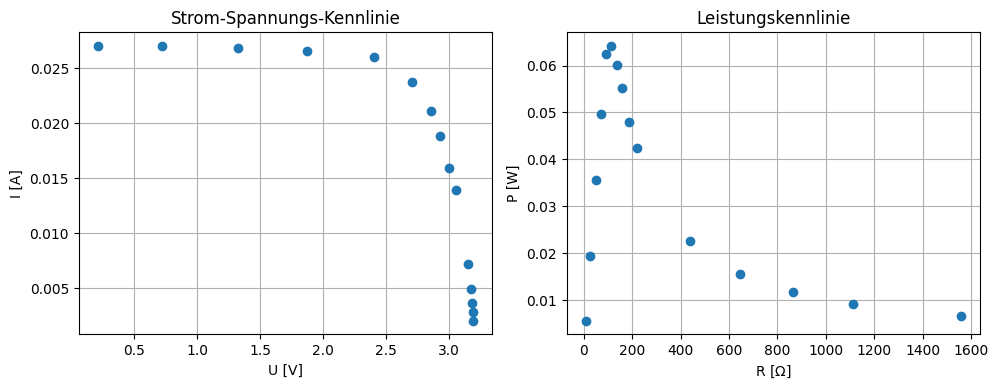

In [43]:
#intensität 7.5 cm same wie vorher basically


U = np.array([207.7, 717, 1326, 1867, 2405, 2704, 2853, 2930, 3001,         3057, 3149, 3174, 3184, 3190, 3189]) /1000         #mv
U_I = np.array([13.2, 13.2, 13.1, 13, 12.7, 11.6, 10.3, 9.2, 7.8,   6.8, 3.5, 2.4, 1.8, 1.4, 1]) /1000    #mv
R_I = ufloat(0.489,8) 
R_I = 0.489 #ohm
# +-*0.08 + 1
U_rel = ((U*0.008+0.001)/U)*100



##uU = unp.uarray(U*1000, U*1000*0.008+1)/1000
U_Irel = ((U_I*0.008+0.00003)/U_I)*100

uU_I = unp.uarray([U_I*1000], [U_I*1000*0.008+0.03])/1000
# +- *0.08 + 0.03

uR_I = ufloat(0.489,0.008) #5%
Urel = 489/8

R_I = 0.489 #ohm




uI = uU_I / uR_I
I = U_I / R_I
I_rel = ((unp.std_devs(uI))/I) *100 # in prozent
print(I_rel)


# I = U_I / R_I #mA
# I_rel = unp.std_devs(uU_I/uR_I)/(U_I/R_I)*100 # relative Unsicherheit Strom #formel noch anschauen!!!
# print(I_rel)


P = U * I   #mW


R = U/I

I_k, I_d, I_r, _, I_std = linregress(U[:int(len(U)/3)],I[:int(len(U)/3)])

U_k, U_d, U_r, _, U_std = linregress(I[int(2*len(U)/3):],U[int(2*len(U)/3):])

I_KS = ufloat(I_d,I_d*0.04)
U_LL = ufloat(U_d,U_d*0.008+0.001)
#I_KS = ufloat(np.max(I),np.max(I)*0.1)
#U_LL = ufloat(np.max(U),np.max(U)*0.1)
idx_max = np.argmax(P)
U_opt = ufloat(U[idx_max],U[idx_max]*0.01)
I_opt = ufloat(I[idx_max],I[idx_max]*0.04)
P_max = ufloat(P[idx_max],P[idx_max]*0.05)
R_L_max = U_opt / I_opt
C_FF = P_max / (I_KS * U_LL)

data = {'U [V]': U, 'U Relativ': U_rel, 'U_I [V]': U_I, 'U_I Relativ': U_Irel, 'I [A]': I, 'P [W]': P}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte und berechnete Größen"))

display(Markdown(f"$$U_{{LL}} = {U_LL:.1u}\\,\\text{{V}}$$"))
display(Markdown(f"$$ I_{{KS}} = {I_KS:.1u}\\,\\text{{A}}$$"))
display(Markdown(f"$$ P_{{max}} = {P_max:.1u}\\,\\text{{W}}$$"))
display(Markdown(f"$$ R_{{L,max}} = {R_L_max:.1u}\\,\\Omega$$"))
display(Markdown(f"$$ C_{{FF}} = {C_FF:.1u}$$"))

plt.figure(figsize=(10,4))
#plt.title('Abstand 7,5 cm') #evtl hinzufügen wenn wir noch den titel drin haben wollen 
plt.subplot(1,2,1)
plt.plot(U, I, 'o')
plt.xlabel('U [V]')
plt.ylabel('I [A]')
plt.title('Strom-Spannungs-Kennlinie')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(R, P, 'o')
plt.xlabel(r'R [$\Omega$]')
plt.ylabel('P [W]')
plt.title('Leistungskennlinie')
plt.grid(True)
plt.tight_layout()
plt.show()

### Diskussion

((Für beide Intensitäten sind sowohl Strom Kennlinie als auch Leistungskennlinie dem Erwarteten Kurvenverlauf aus dem ANleitungstext gleich gekommen. Man erkennt das die Erbrachte Leistung beim zweiten (Lampe näher) versuch stark gestiegen ist, was ebenfalls der erwartung entspricht. 

Die Unsicherheiten der Verschiedenen Werte ergeben sich aus den Relativen änderungen, wobei für die jeweilige Größe die größte relative änderung als unsicherheit zur fortpflanzung verwendet wurde. Dabei ist die Relativ unischerheit des Ersten experiments für die Spannung aufgrund Messbereichwechsel auf 1% geschätzt worden. 

Die Interpolation wird mittels Linearer regression im ersten und Zweiten Drittel der Jeweiligen Graphen gemacht, wobei für U_{LL} und I_{KS} die schnittpunkte der Geraden mit der Jeweiligen achse genutzt wurden.))

## Reale Spannungsquelle

### Aufbau und Durchführung

Bei diesem Versuch wird die Spannungskennlinie einer realen Spannungsquelle ermittelt, um daraus den Innenwiderstand $R_i$ zu berechnen. Dazu wird bei verschiedenen Widerständen Spannung und Stromstärke im Gleichstromkreis gemessen und mit diesen Werten über eine lineare Regressionsfunktion der Innenwiderstand $R_i$ und die Leerlaufspannung $U_0$ berechnet. Die Leerlaufspannung $U_0$ wird auch experimentell ermittelt und mit dem berechneten Wert verglichen.

### Messgeräte und Unsicherheiten

UNI-T-UT61B:
* Spannung: 4V Messbereich, 0.001 Auflösung (0.5% + 1 Digit)

* Strom: 40mA-400mA Messbereich, 0.1 Auflösung (1.2% + 3 Digits)

### Ergebnisse und Auswertung

,I [A],U_KL [V]
0,0.007750,1.570000
1,0.008160,1.569000
2,0.008600,1.569000
3,0.009100,1.569000
4,0.009660,1.569000
5,0.015310,1.567000
6,0.017030,1.565000
7,0.019110,1.565000
8,0.021750,1.564000
9,0.025250,1.563000


$$U_{0,gemessen} = 1.57+/-0.08\,\text{V}$$

$$U_0 = 1.57+/-0.05\,\text{V}$$

$$R_i = 0.32+/-0.02\,\Omega$$

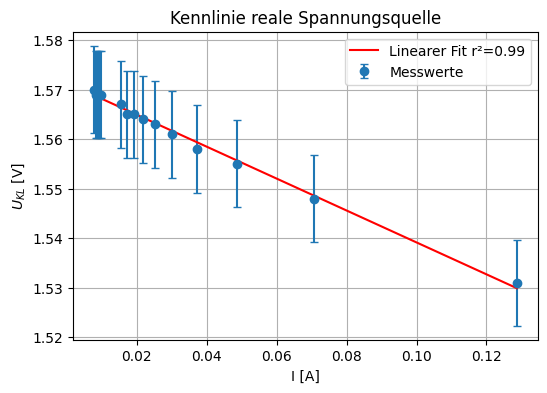

Die Steigung der Regressionsfunktion ist $-0.32$

In [44]:
I = np.array([7.75, 8.16, 8.6, 9.1, 9.66, 15.31, 17.03, 19.11, 21.75, 25.25, 30.1, 37.22, 48.7, 70.7, 128.7]) /1000  # [mA]-->[A] Stromstärke
U_KL = np.array([1.57, 1.569, 1.569, 1.569, 1.569, 1.567, 1.565, 1.565, 1.564, 1.563, 1.561, 1.558, 1.555, 1.548, 1.531])      # [V] Klemmspannung

uI = unp.uarray(I, I*0.012+0.0003) #1,2% # relative Unsicherheit
uU_KL = unp.uarray(U_KL, U_KL*0.005+0.001) #0.5% # relative Unsicherheit

U_KL_fehler = unp.std_devs(uU_KL)

#slope, intercept, r, p, stderr 
res = linregress(I, U_KL)
R_i = -ufloat(res.slope, -res.slope*0.05)
U_0 = ufloat(res.intercept,res.intercept_stderr) # nicht verwendet einf ignorieren
U_0 = ufloat(res.intercept,res.intercept*0.03) # berechneter Wert von U0 mit relativer unsicherheit von 3%
U_0m = ufloat(1.573, 1.573*0.05+0.001) #V; gemessener Wert von U0 mit Geräteunsicherheit

# 1.5 Volt batterie

data = {'I [A]': I, 'U_KL [V]': U_KL}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte der realen Spannungsquelle"))

display(Markdown(f"$$U_{{0,gemessen}} = {U_0m:.2f}\\,\\text{{V}}$$"))
display(Markdown(f"$$U_0 = {U_0:.2f}\\,\\text{{V}}$$"))
display(Markdown(f"$$R_i = {R_i:.2f}\\,\\Omega$$"))


plt.figure(figsize=(6,4))
plt.errorbar(I, U_KL, yerr= U_KL_fehler, fmt='o', capsize=3, label='Messwerte') # evtl noch errorbar?
plt.plot(I, res.slope*I + res.intercept, 'r-', label=rf"Linearer Fit r²={res.rvalue**2:.2f}")
plt.xlabel('I [A]')
plt.ylabel('$U_{{KL}}$ [V]')
plt.title('Kennlinie reale Spannungsquelle')
plt.grid(True)
plt.legend()
plt.show()

display(Markdown(f"Die Steigung der Regressionsfunktion ist ${res.slope:.2f}$"))


## Diskussion

((Das Experiment zeigt ,dass ein Spannungsabfall in dieser Form vorliegt. Die Quellenspannung, ohne Lastwiderstand, beträgt $(1.57\pm 0.08)\Omega$. Der Innenwiderstand beträgt $(0.32\pm 0.02)\Omega$. Die Unsicherheit wurde auf 5% gerundet, da die relativen Unsicherheiten, der Messwerte, unter Fehlerfortpflanzung knapp 3% ergibt und es im Aufbau einen systematischen Fehler gibt, da wir die Innenwiderstände der Messgeräte ignorieren.))